## Observations and Insights

## Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)



In [2]:

mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [3]:
#Study Results DF
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


## Summary statistics

In [4]:
#Summary Stats Table 
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [5]:
# Combine the data into a single dataset
mousedatadf = mouse_metadata.merge(study_results, on='Mouse ID')
mousedatadf.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

In [7]:
# Mean of the tumor volume for each regimen.
TumorVolumeStats = mousedatadf[['Drug Regimen', 'Tumor Volume (mm3)']]
TumorVolumeStatsmean= TumorVolumeStats.groupby('Drug Regimen').mean()
TumorVolumeStatsmean = TumorVolumeStatsmean.rename(columns={'Tumor Volume (mm3)':'Tumor Volume (mm3) Mean'})
TumorVolumeStatsmean



,Tumor Volume (mm3) Mean
Drug Regimen,
Capomulin,40.675741
Ceftamin,52.591172
Infubinol,52.884795
Ketapril,55.235638
Naftisol,54.331565
Placebo,54.033581
Propriva,52.322552
Ramicane,40.216745
Stelasyn,54.233149


In [8]:
# Median of the tumor volume for each regimen.
TumorVolumeStatsmedian= TumorVolumeStats.groupby('Drug Regimen').median()
TumorVolumeStatsmedian = TumorVolumeStatsmedian.rename(columns={'Tumor Volume (mm3)':'Tumor Volume (mm3) Median'})
TumorVolumeStatsmedian

,Tumor Volume (mm3) Median
Drug Regimen,
Capomulin,41.557809
Ceftamin,51.776157
Infubinol,51.820584
Ketapril,53.698743
Naftisol,52.509285
Placebo,52.288934
Propriva,50.854632
Ramicane,40.673236
Stelasyn,52.431737


In [9]:
# Variance of the tumor volume for each regimen.
TumorVolumeStatsvar= TumorVolumeStats.groupby('Drug Regimen').var()
TumorVolumeStatsvar = TumorVolumeStatsvar.rename(columns={'Tumor Volume (mm3)':'Tumor Volume (mm3) Variance'})
TumorVolumeStatsvar

,Tumor Volume (mm3) Variance
Drug Regimen,
Capomulin,24.947764
Ceftamin,39.290177
Infubinol,43.128684
Ketapril,68.553577
Naftisol,66.173479
Placebo,61.168083
Propriva,42.351070
Ramicane,23.486704
Stelasyn,59.450562


In [10]:
# Standard deviation of the tumor volume for each regimen.
TumorVolumeStatsstd= TumorVolumeStats.groupby('Drug Regimen').std()
TumorVolumeStatsstd = TumorVolumeStatsstd.rename(columns={'Tumor Volume (mm3)':'Tumor Volume (mm3) Standard Deviation'})
TumorVolumeStatsstd

,Tumor Volume (mm3) Standard Deviation
Drug Regimen,
Capomulin,4.994774
Ceftamin,6.268188
Infubinol,6.567243
Ketapril,8.279709
Naftisol,8.134708
Placebo,7.821003
Propriva,6.507770
Ramicane,4.846308
Stelasyn,7.710419


In [11]:
# Standard deviation of the tumor volume for each regimen.
TumorVolumeStatssem= TumorVolumeStats.groupby('Drug Regimen').sem()
TumorVolumeStatssem = TumorVolumeStatssem.rename(columns={'Tumor Volume (mm3)':'Tumor Volume (mm3) SEM'})
TumorVolumeStatssem

,Tumor Volume (mm3) SEM
Drug Regimen,
Capomulin,0.329346
Ceftamin,0.469821
Infubinol,0.492236
Ketapril,0.603860
Naftisol,0.596466
Placebo,0.581331
Propriva,0.512884
Ramicane,0.320955
Stelasyn,0.573111


In [12]:
#Merge Tables: mean, median, variance, standard deviation, and SEM
TumorVolumeStats = TumorVolumeStats.merge(TumorVolumeStatsmean, on='Drug Regimen')
TumorVolumeStats = TumorVolumeStats.merge(TumorVolumeStatsmedian, on='Drug Regimen')
TumorVolumeStats = TumorVolumeStats.merge(TumorVolumeStatsvar, on='Drug Regimen')
TumorVolumeStats = TumorVolumeStats.merge(TumorVolumeStatsstd, on='Drug Regimen')
TumorVolumeStats = TumorVolumeStats.merge(TumorVolumeStatssem, on='Drug Regimen')
TumorVolumeStats.head()



,Drug Regimen,Tumor Volume (mm3),Tumor Volume (mm3) Mean,Tumor Volume (mm3) Median,Tumor Volume (mm3) Variance,Tumor Volume (mm3) Standard Deviation,Tumor Volume (mm3) SEM
0,Ramicane,45.000000,40.216745,40.673236,23.486704,4.846308,0.320955
1,Ramicane,38.825898,40.216745,40.673236,23.486704,4.846308,0.320955
2,Ramicane,35.014271,40.216745,40.673236,23.486704,4.846308,0.320955
3,Ramicane,34.223992,40.216745,40.673236,23.486704,4.846308,0.320955
4,Ramicane,32.997729,40.216745,40.673236,23.486704,4.846308,0.320955


## Bar plots

In [18]:
# Set X and Y Axis for Chart showing number of data points for each treatment regimen
x_axis = TumorVolumeStats['Drug Regimen'].unique()
x_axis
y_axis = TumorVolumeStats['Drug Regimen'].value_counts()
y_axis
ticklocations = [value for value in x_axis]

In [44]:
RegimenDatapointsdf = pd.DataFrame(x_axis, y_axis)
RegimenDatapointsdf.reset_index(level=0, inplace=True)
RegimenDatapointsdf = RegimenDatapointsdf.set_index(list(RegimenDatapointsdf.columns[[1]]))
RegimenDatapointsdf

,Drug Regimen
0,
Ramicane,230
Capomulin,228
Infubinol,188
Placebo,186
Ceftamin,182
Stelasyn,181
Zoniferol,181
Ketapril,178
Propriva,178


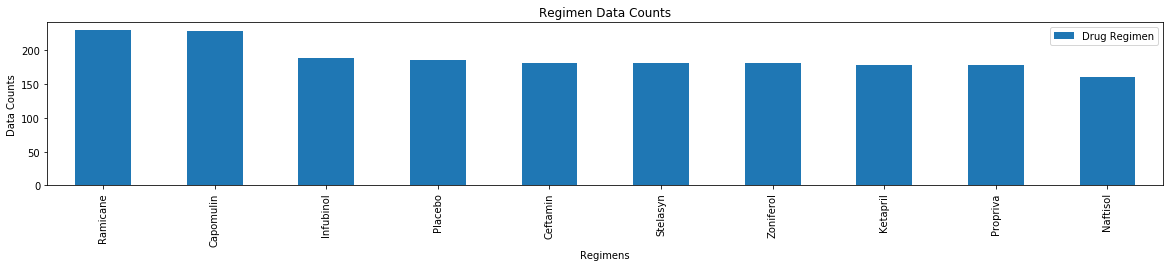

<Figure size 432x288 with 0 Axes>

In [56]:
RegimenDatapointsdf.plot(kind="bar", figsize=(20,3))
# Set a title for the chart
plt.title("Regimen Data Counts")
plt.xlabel('Regimens')
plt.ylabel('Data Counts')
plt.show()
plt.tight_layout()

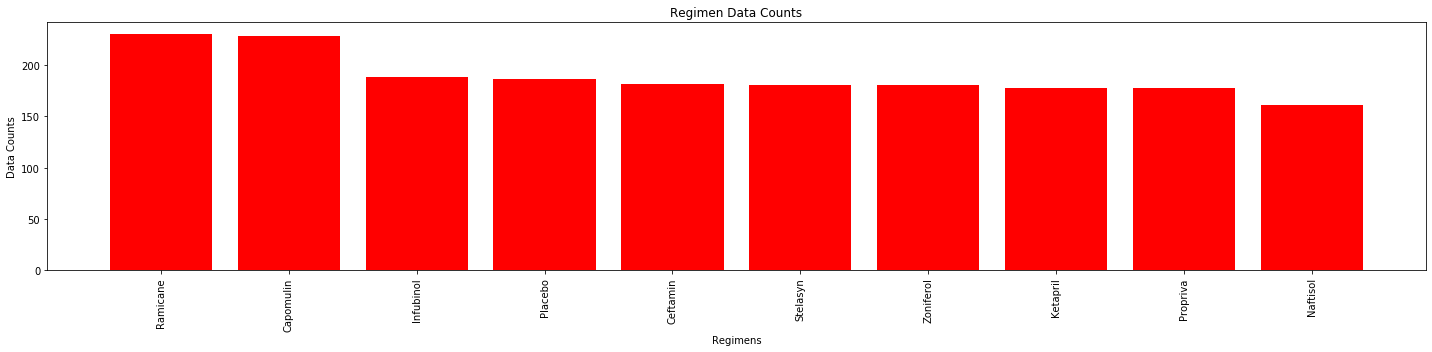

In [60]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
plt.figure(figsize=(20,5))
plt.bar(x_axis, y_axis, color='r', alpha=1.0, align="center")
plt.xticks(ticklocations, x_axis, rotation="vertical")
plt.title("Regimen Data Counts")
plt.xlabel('Regimens')
plt.ylabel('Data Counts')
#plt.legend(loction='best')
plt.tight_layout()
plt.show()

## Pie plots

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pandas


In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

## Quartiles, outliers and boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

## Line and scatter plots

In [ ]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

In [ ]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen